### Multiple Parallel Input and Multi-step output

The shape of the raw_data before scaling is (43800, 5)
Initial shape of x_input (30, 5)
The shape of yhat after prediction is (1, 10, 5)
The new shape of yhat  is (10, 5)
[[  13.574765   -10.226698    11.028248  1028.9268      53.71773  ]
 [   6.1193395  -12.504639    12.375994  1026.1132      43.24208  ]
 [  14.647548   -11.236615    12.066568  1026.3605      34.11836  ]
 [  22.392859   -10.203784    10.616951  1026.4955      30.767149 ]
 [  27.996674    -9.302486     9.065703  1026.9268      29.941402 ]
 [  31.346882    -8.68747      7.724215  1027.3652      29.90269  ]
 [  32.878716    -8.292669     6.696349  1027.7343      29.84956  ]
 [  33.27082     -8.049689     5.961406  1028.0164      29.613152 ]
 [  33.067783    -7.9039187    5.460861  1028.2195      29.232582 ]
 [  32.622993    -7.817561     5.132776  1028.3593      28.788733 ]]
-------Learning Curve--------


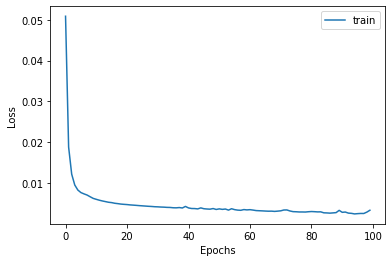

In [51]:
# multivariate output stacked lstm example
from numpy import array
from numpy import hstack, vstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers.core import Dropout
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np


# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence

# Read the data
data = read_csv('pollution2.csv', header=0, index_col=0)

# horizontally stack columns
raw_data = data.values
print(f'The shape of the raw_data before scaling is {raw_data.shape}')
#normalize input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(raw_data)

n_train = 2000
#dataset = raw_data[0:n_train,:]
dataset = scaled_data[0:n_train,:]
# choose a number of time steps
n_steps_in, n_steps_out = 30, 10
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
# fit model
train_history = model.fit(X, y, epochs=100, verbose=0, shuffle=False)

# demonstrate iterative prediction
# x_inp = raw_data[n_train:n_train+n_steps,:]
x_inp = scaled_data[n_train:n_train+n_steps_in,:]
print(f'Initial shape of x_input {x_inp.shape}')
x_input = x_inp.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(f'The shape of yhat after prediction is {yhat.shape}')
yhat = yhat.reshape(n_steps_out, n_features)
print(f'The new shape of yhat  is {yhat.shape}')
inv_yhat = scaler.inverse_transform(yhat)
print(inv_yhat)

print("-------Learning Curve--------")
plt.plot(train_history.history['loss'], label='train')
# plt.plot(train_history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

-------Learning Curve--------


KeyError: 'accuracy'

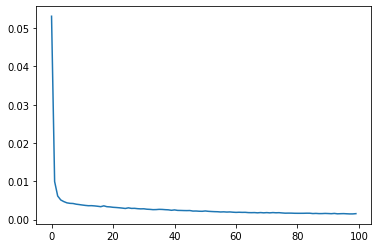

In [49]:
print("-------Learning Curve--------")
plt.plot(train_history.history['loss'], label='train')
plt.plot(train_history.history['accuracy'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [48]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 50)                11200     
                                                                 
 repeat_vector_9 (RepeatVect  (None, 10, 50)           0         
 or)                                                             
                                                                 
 lstm_23 (LSTM)              (None, 10, 50)            20200     
                                                                 
 time_distributed_9 (TimeDis  (None, 10, 5)            255       
 tributed)                                                       
                                                                 
Total params: 31,655
Trainable params: 31,655
Non-trainable params: 0
_________________________________________________________________
